In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [26]:
data = pd.read_csv(r"C:\Users\peash\Desktop\cse445 project\dataset.csv")
df = pd.DataFrame(data)
df.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
Ambient_Temperature    9568 non-null float64
Exhaust_Vaccum         9568 non-null float64
Ambient_Pressure       9568 non-null float64
Relative_Humidity      9568 non-null float64
Energy_Output          9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


,Ambient_Temperature,Exhaust_Vaccum,Ambient_Pressure,Relative_Humidity,Energy_Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [27]:
df.describe()

,Ambient_Temperature,Exhaust_Vaccum,Ambient_Pressure,Relative_Humidity,Energy_Output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


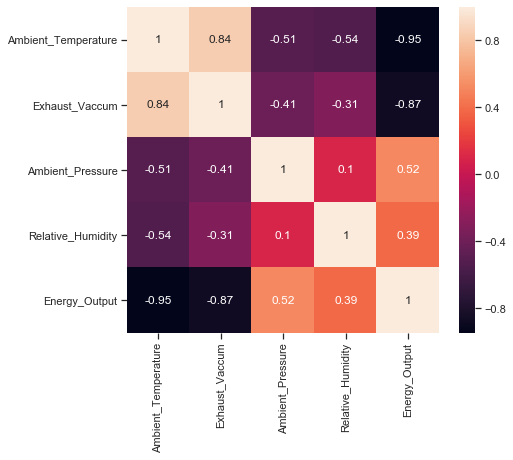

In [28]:
plt.figure(figsize = (7, 6))
sns.heatmap(df.corr(), annot = True)

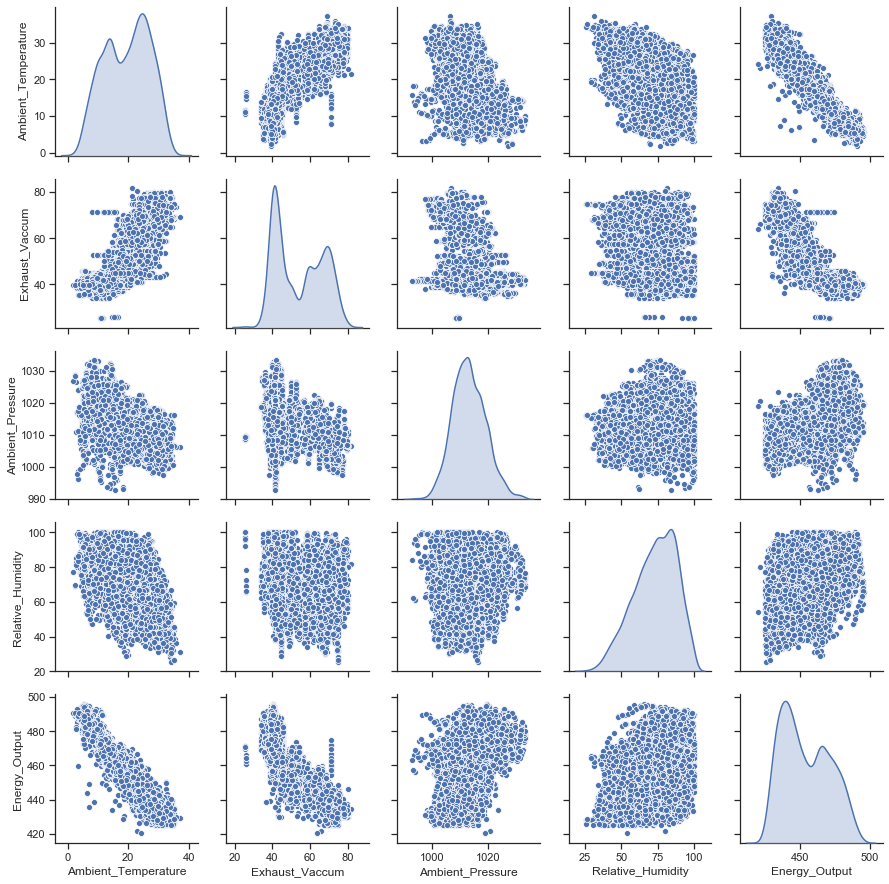

In [29]:
sns.set(style="ticks")
sns.pairplot(df, diag_kind = 'kde')


In [30]:
df_1 = df['Ambient_Temperature']

df_2 = df[['Ambient_Temperature', 'Exhaust_Vaccum']]

df_3 = df[['Ambient_Temperature', 'Exhaust_Vaccum', 'Relative_Humidity']]

df_4 = df[['Ambient_Temperature', 'Exhaust_Vaccum', 'Relative_Humidity','Ambient_Pressure']]


In [31]:
y = df['Energy_Output']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_4, y, test_size = 0.2, random_state = 0)

In [33]:
dt_regressor= DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)

In [34]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R Squared Value:', metrics.r2_score(y_test, y_pred))

Mean Squared Error: 22.540040177638453
Root Mean Squared Error: 4.747635219521236
Mean Absolute Error: 3.1274555903866244
R Squared Value: 0.922936828675541


In [35]:
rf_regressor= RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

C:\Users\peash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [36]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R Squared Value:', metrics.r2_score(y_test, y_pred))

Mean Squared Error: 11.815479892372005
Root Mean Squared Error: 3.4373652544313655
Mean Absolute Error: 2.4944963427377234
R Squared Value: 0.9596035169391627
